In [3]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from Clean_df_all import df_total_set, df_in_sample_set, df_training_set, df_test_set, df_out_sample_set
from scipy.special import expit


from arma.arma import arma_model
from star.star import star_model


warnings.filterwarnings("ignore")

In [4]:
df_in_sample_set

,SPY US Equity,DIA US Equity,QQQ US Equity
2011-01-16,0.016846,0.009562,0.020024
2011-01-23,-0.007219,0.006521,-0.023430
2011-01-30,-0.005076,-0.003721,0.000898
2011-02-06,0.026501,0.022371,0.029090
2011-02-13,0.014834,0.016109,0.018392
...,...,...,...
2020-12-13,-0.009645,-0.005501,-0.012085
2020-12-20,0.007832,0.003218,0.026836
2020-12-27,-0.000488,0.000397,-0.001614
2021-01-03,0.013138,0.012405,0.013413


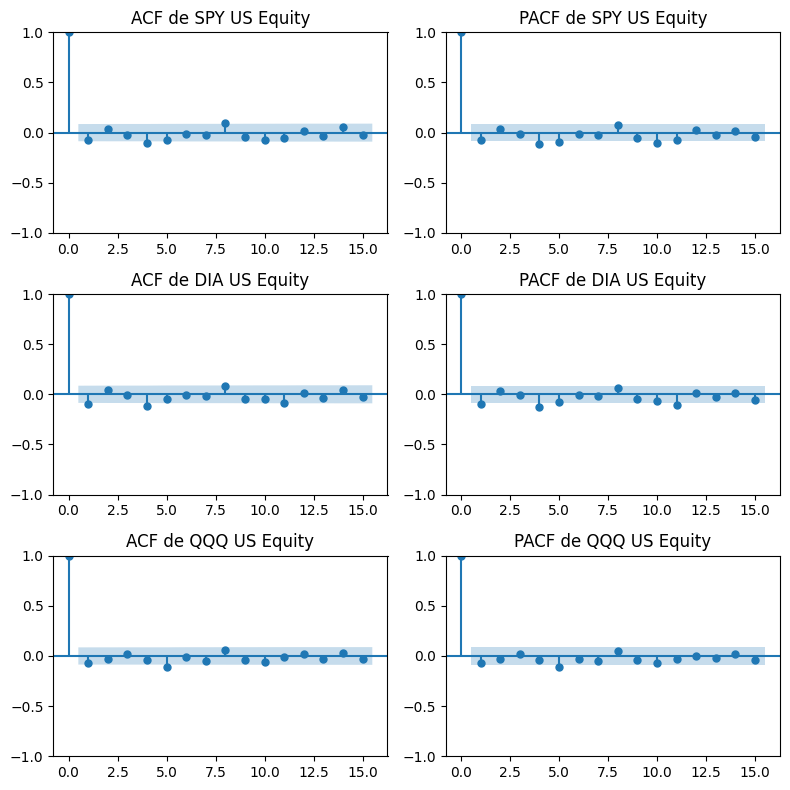

In [5]:
# Crée un sous-plot pour chaque série de prix
fig, axes = plt.subplots(3, 2, figsize=(8, 8))

for i, col in enumerate(df_in_sample_set.columns):
    plot_acf(df_in_sample_set[col].dropna(), ax=axes[i, 0], lags=15)
    plot_pacf(df_in_sample_set[col].dropna(), ax=axes[i, 1], lags=15)
    axes[i, 0].set_title(f"ACF de {col}")
    axes[i, 1].set_title(f"PACF de {col}")

plt.tight_layout()
plt.show()

Mean Squared Error on test set: 0.00032375296244712505


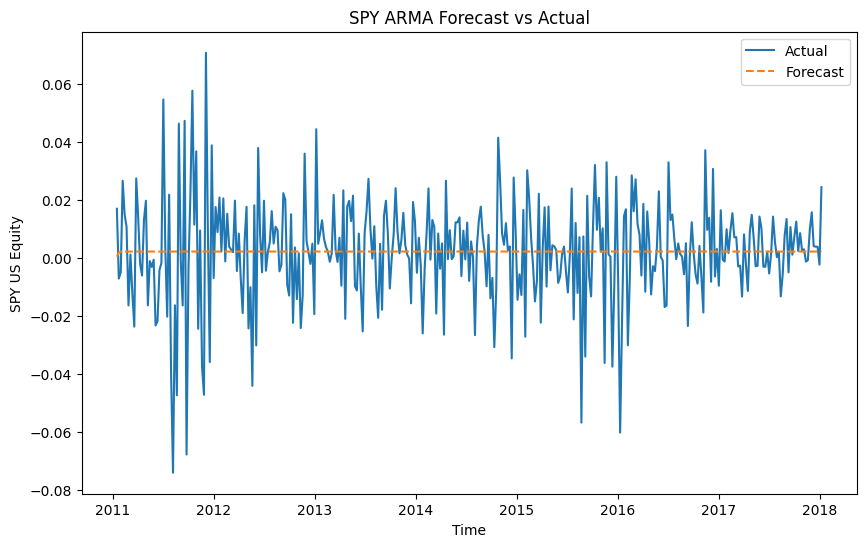

In [6]:
spy_arma = arma_model(df_training_set['SPY US Equity'], (1,1))
dia_arma = arma_model(df_training_set['DIA US Equity'], (1,1))
qqq_arma = arma_model(df_training_set['QQQ US Equity'], (1,1))

# New cell: Forecast predictions and compare with df_test_set
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

n_steps = len(df_training_set)
spy_forecast = spy_arma.forecast(steps=n_steps)

# Get the actual values for SPY from the test set
spy_actual = df_training_set['SPY US Equity']

# Calculate mean squared error
mse = mean_squared_error(spy_actual, spy_forecast)
print("Mean Squared Error on test set:", mse)

# Plot the actual values and the predictions
plt.figure(figsize=(10,6))
plt.plot(spy_actual.index, spy_actual.values, label='Actual')
plt.plot(spy_actual.index, spy_forecast, label='Forecast', linestyle='--')
plt.xlabel('Time')
plt.ylabel('SPY US Equity')
plt.title('SPY ARMA Forecast vs Actual')
plt.legend()
plt.show()



In [7]:
# Select the series you want to model from the test set
series_to_fit = df_test_set['SPY US Equity']

# Fit the STAR model, now passing the transition variable as a pandas Series
star_result = star_model(series_to_fit, lags=1, transition_variable=series_to_fit, d=1)

# Display STAR model results
print("STAR Model Estimated Parameters:")
print("Params:", star_result['params'])
print("phi:", star_result['phi'])
print("beta:", star_result['beta'])
print("gamma:", star_result['gamma'])
print("c:", star_result['c'])

print("\nFitted values:")
print(star_result['fitted'])

print("\nResiduals:")
print(star_result['residuals'])

print("\nOptimization Successful:", star_result['success'])
print("Message:", star_result['message'])

STAR Model Estimated Parameters:
Params: [ -18.32723092 -270.11434735   18.3301052   270.28068758   33.27816811
   -0.29119439]
phi: [ -18.32723092 -270.11434735]
beta: [ 18.3301052  270.28068758]
gamma: 33.27816810711382
c: -0.2911943907477847

Fitted values:
2018-01-21    0.004544
2018-01-28    0.003736
2018-02-04    0.000898
2018-02-11   -0.006373
2018-02-18   -0.005833
                ...   
2020-12-06    0.005865
2020-12-13    0.003726
2020-12-20    0.000520
2020-12-27    0.002891
2021-01-03    0.002066
Freq: W-SUN, Length: 155, dtype: float64

Residuals:
2018-01-21    0.017221
2018-01-28   -0.043348
2018-02-04   -0.052870
2018-02-11    0.049814
2018-02-18    0.011675
                ...   
2020-12-06   -0.015509
2020-12-13    0.004106
2020-12-20   -0.001008
2020-12-27    0.010247
2021-01-03    0.017481
Freq: W-SUN, Length: 155, dtype: float64

Optimization Successful: True
Message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH


In [8]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy.stats import jarque_bera

# Perform Ljung-Box test on residuals (at lag 10, or change as needed)
lb_test = acorr_ljungbox(star_result['residuals'], lags=[10], return_df=True)
print("Ljung-Box test results:")
print(lb_test)

# Perform Jarque-Bera test for normality
jb_stat, jb_pvalue = jarque_bera(star_result['residuals'].dropna())
print("\nJarque-Bera test statistic: {:.4f}, p-value: {:.4f}".format(jb_stat, jb_pvalue))

Ljung-Box test results:
     lb_stat  lb_pvalue
10  6.332766   0.786574

Jarque-Bera test statistic: 169.9251, p-value: 0.0000


In [ ]:
spy_arma = arma_model(df_training_set['SPY US Equity'], (1,1))
dia_arma = arma_model(df_training_set['DIA US Equity'], (1,1))
qqq_arma = arma_model(df_training_set['QQQ US Equity'], (1,1))

In [12]:
spy_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          SPY US Equity   No. Observations:                  502
Model:                 ARIMA(1, 0, 1)   Log Likelihood                1521.244
Date:                Sat, 03 May 2025   AIC                          -3034.487
Time:                        15:45:34   BIC                          -3017.613
Sample:                             0   HQIC                         -3027.867
                                - 502                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.001      0.596      0.551      -0.001       0.001
ar.L1         -0.0357      0.390     -0.092      0.927      -0.800       0.729
ma.L1         -0.0357      0.396     -0.090      0.928      -0.813       0.741
sigma2         0.0001   5.93e-06     23.014      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               306.04
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.44   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
spy_test = spy_arma

In [9]:
spy_test

2011-01-03    0.000308
2011-01-04   -0.000406
2011-01-05    0.000344
2011-01-06   -0.000040
2011-01-07    0.000458
                ...   
2012-12-24    0.001463
2012-12-26    0.000591
2012-12-27    0.000641
2012-12-28    0.000437
2012-12-31    0.001107
Name: predicted_mean, Length: 502, dtype: float64